In [1]:
import pandas as pd
import numpy as np

nba = pd.read_csv("nba_2013.csv")
nba.head(3)

player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  \
0    Quincy Acy  SF   23          TOT  63   0   847   66  141  0.468   
1  Steven Adams   C   20          OKC  81  20  1197   93  185  0.503   
2   Jeff Adrien  PF   27          TOT  53  12   961  143  275  0.520   

      ...      drb  trb  ast  stl  blk  tov   pf  pts     season  season_end  
0     ...      144  216   28   23   26   30  122  171  2013-2014        2013  
1     ...      190  332   43   40   57   71  203  265  2013-2014        2013  
2     ...      204  306   38   24   36   39  108  362  2013-2014        2013  

[3 rows x 31 columns]

# Point Guards
We are going to focus our lesson on a machine learning technique called clustering, which allows us to visualize the types of point guards as well as group similar point guards together.

Using 2 features allows us to easily visualize the players and will also make it easier to grasp how clustering works.



In [2]:
point_guards = nba[nba["pos"] == 'PG']

# Points Per Game

In [5]:
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Assist Turnover Ratio

In [8]:
point_guards = point_guards[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast'] / point_guards['tov']

# Visualizing the Point Guards

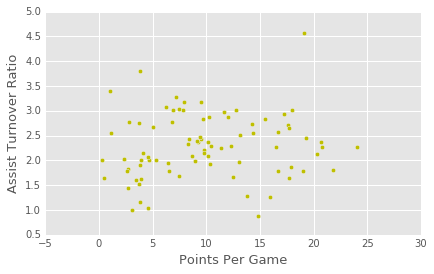

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(point_guards['ppg'],point_guards['atr'],c='y')
plt.xlabel('Points Per Game',fontsize=13)
plt.ylabel('Assist Turnover Ratio',fontsize=13)
plt.style.use('bmh')
plt.show()

# Clustering players
we need to instead use unsupervised machine learning techniques to explore the structure within a data set that doesn't have a clear value to optimize.

There are multiple ways of clustering data but here we will focus on centroid based clustering for this lesson.

The key part with K-Means (and most unsupervised machine learning techniques) is that we have to specify what k is. There are advantages and disadvantages to this, but one advantage is that we can pick the k that makes the most sense for our use case.

# The Algorithm
Setup K-Means is an iterative algorithm that switches between recalculating the centroid of each cluster and the players that belong to that cluster.To start, select 5 players at random and assign their coordinates as the initial centroids of the just created clusters.

Step 1 (Assign Points to Clusters) For each player, calculate the Euclidean distance between that player's coordinates, or values for atr & ppg, and each of the centroids' coordinates. Assign the player to the cluster whose centroid is the closest to, or has the lowest Euclidean distance to, the player's values.

Step 2 (Update New Centroids of the Clusters) For each cluster, compute the new centroid by calculating the arithmetic mean of all of the points (players) in that cluster. We calculate the arithmetic mean by taking the average of all of the X values (atr) and the average of all of the Y values (ppg) of the points in that cluster.




In [26]:
num_clusters = 5
random_initial_points = np.random.choice(point_guards.index,size=num_clusters)
centroids = point_guards.ix[random_initial_points]

# Visualize Centroids

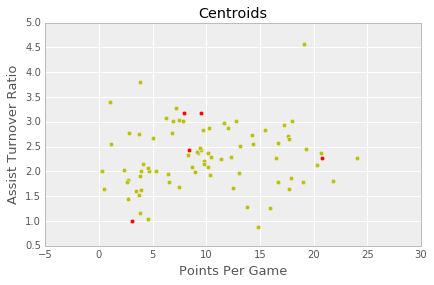

In [27]:
plt.scatter(point_guards['ppg'],point_guards['atr'],c='y')
plt.scatter(centroids['ppg'],centroids['atr'],c='r')
plt.title('Centroids')
plt.xlabel('Points Per Game',fontsize=13)
plt.ylabel('Assist Turnover Ratio',fontsize=13)
plt.show()

# Setup (continued)
Moving forward, let's use a dictionary object instead to represent the centroids.

We will need a unique identifier, like cluster_id, to refer to each cluster's centroid and a list representation of the centroid's coordinates (or values for ppg and atr). 

To generate the cluster_ids, let's iterate through each centroid and assign an integer from 0 to k-1. For example, the first centroid will have a cluster_id of 0, while the second one will have a cluster_id of 1.



In [30]:
def centroids_to_dict(centroids):
    dictionary = dict()
    counter = 0
    
    for index,row in centroids.iterrows():
        coordinates = [row['ppg'],row['atr']]
        dictionary[counter] =coordinates
        
    return dictionary

centroids_dict = centroids_to_dict(centroids)

# Step 1 (Euclidean Distance)
While in higher dimensions, Euclidean distance can be misleading, in 2 dimensions Euclidean distance is essentially the Pythagorean theorem. 

In [ ]:
import math

def calculate_distance(centroid,player_values):
    root_distance = 0
    
    for x in
    
    for x in range()